# Anomaly Detection: From Statistical Methods to Ensemble Learning

 Unsupervised Learning, Anomaly Detection (Outlier Detection), Point Anomalies, Z-score (Standard Score), Gaussian Distribution, Isolation Forest, Path Length, Multivariate vs. Univariate analysis.



### **Objectives:**

* Students will understand the importance of **anomaly detection** in domains like fraud detection, network security, and system health monitoring.
* Students will grasp the statistical foundation of the **Z-score** method, its assumption of a normal distribution, and its application for **univariate** outlier detection.
* Students will understand the core intuition of the **Isolation Forest** algorithm, which isolates anomalies based on the principle that they are "few and different."
* Students will implement the Isolation Forest algorithm using `scikit-learn` for **multivariate** anomaly detection.
* Students will visualize and interpret the results from both methods, learning to identify anomalous data points.
* Students will critically compare the strengths, weaknesses, and appropriate use cases of the statistical Z-score method versus the ensemble-based Isolation Forest.



### **Setup: Install and Import Libraries**

In [1]:
# No special installs are needed
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Scikit-learn for the Isolation Forest model, datasets, and preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Scipy for statistical functions
from scipy.stats import skewnorm

# Set plot style for better aesthetics
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)


# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(f"Pandas Version: {pd.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")

Pandas Version: 2.2.2
Scikit-learn Version: 1.6.1


### **Part 1: The Z-Score Method (Univariate Anomaly Detection)**

The Z-score is a simple yet effective statistical method for finding outliers in **univariate** data (a single feature). It measures how many standard deviations a data point is from the mean of the distribution.

* **Formula**: $Z = \frac{(x - \mu)}{\sigma}$, where $\mu$ is the mean and $\sigma$ is the standard deviation.
* **Key Assumption**: This method works best when the data is **approximately normally distributed** (Gaussian).
* **Rule of Thumb**: Data points with an absolute Z-score of greater than 3 are typically considered outliers, as they are very rare in a normal distribution.

--- Part 1: Anomaly Detection with Z-Score ---


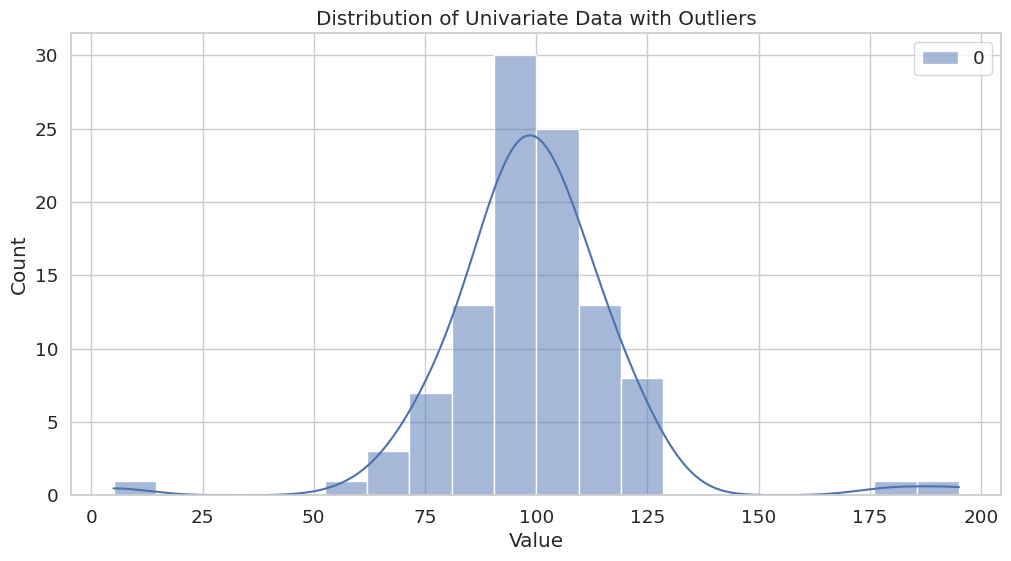


Anomalies identified by Z-score (|Z| > 3):
 [180. 195.   5.]


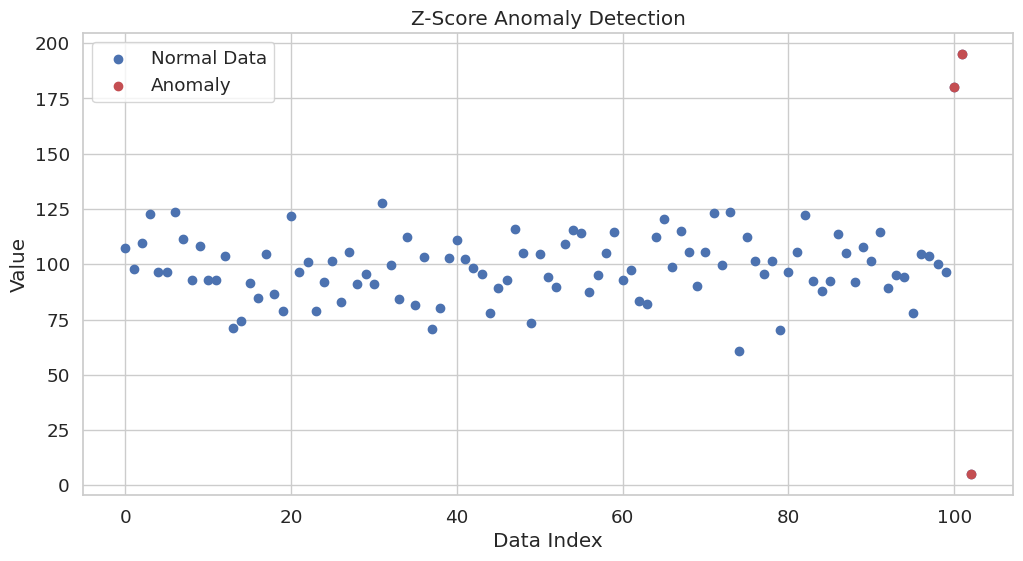

In [2]:
print("--- Part 1: Anomaly Detection with Z-Score ---")

# 1. Generate a normally distributed dataset with some clear outliers
np.random.seed(42)
normal_data = np.random.randn(100, 1) * 15 + 100
outliers = np.array([[180], [195], [5]])
data_univariate = np.concatenate([normal_data, outliers])

# 2. Visualize the data to spot the outliers
plt.figure(figsize=(12, 6))
sns.histplot(data_univariate, kde=True, bins=20)
plt.title('Distribution of Univariate Data with Outliers')
plt.xlabel('Value')
plt.show()

# 3. Calculate Z-scores
mean = np.mean(data_univariate)
std_dev = np.std(data_univariate)
z_scores = (data_univariate - mean) / std_dev

# 4. Identify anomalies based on a threshold (e.g., |Z| > 3)
threshold = 3
anomalies_z = data_univariate[np.abs(z_scores) > threshold]
print(f"\nAnomalies identified by Z-score (|Z| > {threshold}):\n", anomalies_z)

# 5. Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(range(len(data_univariate)), data_univariate, label='Normal Data')
plt.scatter(np.where(np.abs(z_scores) > threshold)[0], anomalies_z, color='r', label='Anomaly')
plt.title('Z-Score Anomaly Detection')
plt.xlabel('Data Index')
plt.ylabel('Value')
plt.legend()
plt.show()

### **Part 2: Limitations of Z-Score & Introduction to Isolation Forest**

The Z-score method is fast and easy, but it has two major limitations:
1.  **Univariate**: It only works on one feature at a time.
2.  **Assumes Normality**: It fails if the data is not normally distributed.

For real-world, high-dimensional problems, we need a more robust approach. The **Isolation Forest** is a powerful, modern algorithm perfect for this.

**Core Intuition:**
The algorithm is built on a simple yet profound idea: **Anomalies are "few and different."**
* Because they are "few," they are more susceptible to being isolated.
* Because they are "different," they require fewer random partitions to be separated from the rest of the data.

The Isolation Forest builds an ensemble of "Isolation Trees" (random decision trees). To find the anomaly score of a data point, it averages the **path length** required to isolate that point across all the trees. Anomalous points are easier to separate and will have a much shorter average path length than normal points.

### **Part 3: Isolation Forest (Multivariate Anomaly Detection)**

Let's apply the Isolation Forest to a **multivariate** dataset where anomalies don't just have extreme values in one dimension, but are unusual combinations of features. We will create a synthetic dataset with several dense clusters of "normal" points and a few scattered "anomalous" points.


--- Part 3: Anomaly Detection with Isolation Forest ---


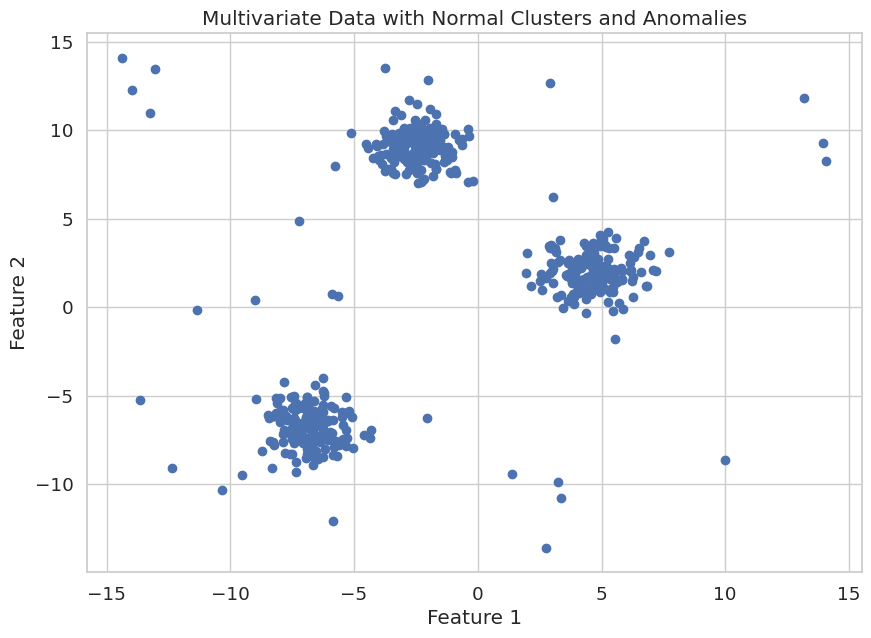

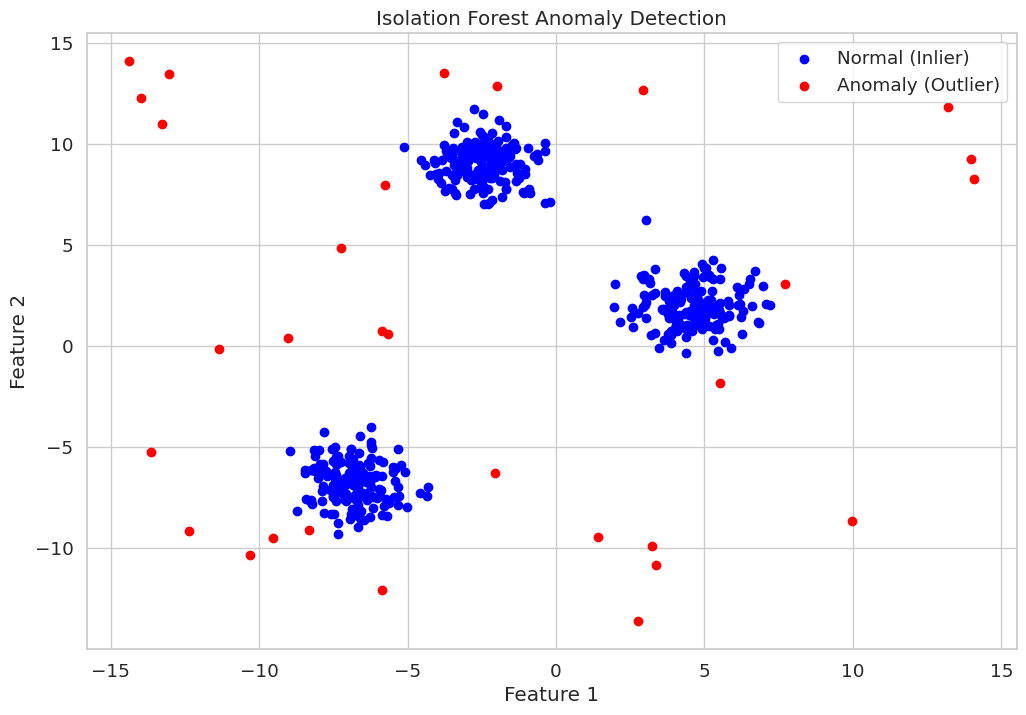

In [3]:
print("\n--- Part 3: Anomaly Detection with Isolation Forest ---")

# 1. Generate multivariate data with clusters and anomalies
np.random.seed(42)
# Normal data points in clusters
X_normal, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
# Anomalous points scattered far away
X_anomalies = np.random.uniform(low=-15, high=15, size=(30, 2))
X_multivariate = np.vstack([X_normal, X_anomalies])

# 2. Visualize the raw data
plt.figure(figsize=(10, 7))
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], c='b')
plt.title('Multivariate Data with Normal Clusters and Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 3. Initialize and fit the Isolation Forest model
# `contamination` is the expected proportion of outliers in the data. This is the most important hyperparameter.
# It's often set based on domain knowledge.
contamination_level = 30 / 530 # We know the true ratio in our synthetic data
iso_forest = IsolationForest(n_estimators=100, contamination=contamination_level, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_multivariate) # Returns 1 for inliers, -1 for outliers

# 4. Visualize the results
plt.figure(figsize=(12, 8))
# Plot normal points (predicted as 1)
plt.scatter(X_multivariate[y_pred_iso == 1, 0], X_multivariate[y_pred_iso == 1, 1],
            c='blue', label='Normal (Inlier)')
# Plot anomalies (predicted as -1)
plt.scatter(X_multivariate[y_pred_iso == -1, 0], X_multivariate[y_pred_iso == -1, 1],
            c='red', label='Anomaly (Outlier)')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# INSIGHT: The Isolation Forest correctly identifies the scattered points as anomalies while keeping the points within the dense clusters as normal.

### **Part 4: Comparison and Discussion**

| Feature | Z-Score | Isolation Forest |
| :--- | :--- | :--- |
| **Data Type** | **Univariate** (one feature at a time). | **Multivariate** (handles many features). |
| **Assumptions** | Assumes data is **Normally Distributed**. | **Non-parametric** (makes no assumption about the data's distribution). |
| **Method** | Statistical (distance from the mean). | Ensemble of Trees (ease of isolation). |
| **Complexity** | Very simple and fast. | More complex, but still highly efficient and scalable. |
| **Use Case** | A quick check for outliers in a single feature that is known to be bell-shaped. | A powerful, general-purpose algorithm for finding anomalies in high-dimensional, complex datasets. |

### **Lab Tasks & Exercises**

Now, apply what you've learned to explore the limitations and capabilities of these methods.

In [4]:
# --- TASK 1: Z-Score on Non-Normal Data ---
# The Z-score method's biggest weakness is its reliance on a normal distribution.
# 1. Generate a skewed dataset (e.g., using a log-normal distribution).
# 2. Add an outlier that is far out on the long tail.
# 3. Apply the Z-score method. Does it successfully identify the outlier, or does the skew "hide" it?

# YOUR CODE HERE
# np.random.seed(42)
# skewed_data = np.random.lognormal(mean=2, sigma=1, size=100)
# skewed_outlier = np.array([[50]])
# skewed_data_full = np.concatenate([skewed_data, skewed_outlier])
#
# z_scores_skewed = (skewed_data_full - np.mean(skewed_data_full)) / np.std(skewed_data_full)
#
# plt.figure(figsize=(10,7))
# sns.histplot(skewed_data_full, kde=True, bins=20)
# plt.title('Skewed Data')
# plt.show()
#
# print("--- Task 1: Z-Score on Skewed Data ---")
# print(f"Max Z-score in skewed data: {np.max(z_scores_skewed):.2f}")
# print("Observation: In a skewed distribution, the standard deviation is large, which can cause the Z-score of even extreme outliers to fall below the typical threshold of 3, failing to detect them.")


# --- TASK 2: The Effect of the `contamination` Parameter ---
# The `contamination` parameter in Isolation Forest tells the model what percentage of data to flag as anomalous.
# Re-run the Isolation Forest on the blobs dataset from Part 3, but with:
#   1. A very low contamination (e.g., 0.01)
#   2. A very high contamination (e.g., 0.2)
# Visualize both results. How does this parameter control the model's sensitivity?

# YOUR CODE HERE
# iso_low_cont = IsolationForest(contamination=0.01, random_state=42).fit_predict(X_multivariate)
# iso_high_cont = IsolationForest(contamination=0.2, random_state=42).fit_predict(X_multivariate)
#
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
# ax1.scatter(X_multivariate[:,0], X_multivariate[:,1], c=iso_low_cont, cmap='viridis')
# ax1.set_title('Low Contamination (0.01)')
# ax2.scatter(X_multivariate[:,0], X_multivariate[:,1], c=iso_high_cont, cmap='viridis')
# ax2.set_title('High Contamination (0.2)')
# plt.show()
# print("Observation: The `contamination` parameter directly controls the decision threshold. A low value makes the algorithm more conservative (fewer anomalies), while a high value makes it more aggressive (more anomalies).")


# --- TASK 3: Real-World Application ---
# Apply Isolation Forest to the "Mall Customers" dataset from the Hierarchical Clustering lab.
# Find the customers who are considered anomalous based on their income and spending habits.
# Set a reasonable contamination level (e.g., 0.05). Do these anomalous customers make intuitive sense?

# YOUR CODE HERE
# url_mall = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'
# df_mall = pd.read_csv(url_mall)
# X_mall = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']]
# X_mall_scaled = StandardScaler().fit_transform(X_mall)
#
# iso_mall = IsolationForest(contamination=0.05, random_state=42).fit_predict(X_mall_scaled)
# df_mall['Anomaly'] = iso_mall
#
# plt.figure(figsize=(12,8))
# sns.scatterplot(data=df_mall, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Anomaly', palette={1: 'blue', -1: 'red'})
# plt.title('Anomalies in Mall Customer Data')
# plt.show()
# print("Anomalous Customers:")
# print(df_mall[df_mall['Anomaly'] == -1])
# print("Observation: The anomalies are customers with very high income but very low spending, or very low income but very high spending. These represent the extremes and make intuitive sense as anomalous behaviors compared to the main customer clusters.")

### **Part 5: Advanced Topics & Discussion**

* **Types of Anomalies:**
    The methods we've discussed are for finding **point anomalies** (single instances that are anomalous). Other types include:
    * **Contextual Anomalies**: A data point is anomalous in a specific context (e.g., a person spending $100 on a winter coat in summer).
    * **Collective Anomalies**: A collection of related data instances is anomalous as a group, even if individual points are not (e.g., a human heartbeat EKG showing a flat line for a few seconds).

* **Other Anomaly Detection Algorithms:**
    Beyond Z-score and Isolation Forest, other popular methods include:
    * **Local Outlier Factor (LOF)**: A density-based algorithm (like DBSCAN) that compares the local density of a point to that of its neighbors. It's good at finding anomalies in datasets with varying densities.
    * **One-Class SVM**: An adaptation of Support Vector Machines for unsupervised learning. It learns a boundary that encompasses the "normal" data points, and any point outside this boundary is considered an anomaly.

* **Supervised vs. Unsupervised Anomaly Detection:**
    This lab focused on **unsupervised** methods, where we have no prior labels for what is an anomaly. If you have a labeled dataset with known anomalies, the problem can be framed as a **supervised classification** task. However, this is often challenging because anomalies are, by definition, rare, leading to a severely imbalanced dataset.

---
  
<center>

<span style="color:#1f4e79">

Prepared By

**<span style="font-size:1.5em">Md. Atikuzzaman</span>**  
Lecturer  
Department of Computer Science and Engineering  
Green University of Bangladesh  
Email: atik@cse.green.edu.bd  

</span>
</center>

---